# Hierarchical DivNoising - Prediction
This notebook contains an example on how to use a previously trained Hierarchical DivNoising model to denoise images.
If you haven't done so please first run '1-Training.ipynb', which will train the model. 

In [1]:
# We import all our dependencies.
import numpy as np
import torch
import sys
sys.path.append('../../../')
import lib.utils as utils
from boilerplate import boilerplate
from matplotlib import pyplot as plt

In [2]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

# Load GT test data

In [3]:
test_images_gt = np.load('data/BSD68_reproducibility_data/test/bsd68_groundtruth.npy', allow_pickle=True)

# Load noisy test data

In [4]:
test_images = np.load('data/BSD68_reproducibility_data/test/bsd68_gaussian25.npy', allow_pickle=True)

# Load our model

In [5]:
%%capture
model = torch.load("./Trained_model/model/natural_last_vae.net")
model.mode_pred=True
model.eval()

# Compute PSNR
The higher the PSNR, the better the denoing performance is.
PSNR is computed using the formula: 

```PSNR = 20 * log(rangePSNR) - 10 * log(mse)``` <br> 
where ```mse = mean((gt - img)**2)```, gt is ground truth image and img is the prediction from HDN. All logarithms are with base 10.<br>
rangePSNR = 255 for natural images as used in this [paper](https://openaccess.thecvf.com/content_CVPR_2019/papers/Krull_Noise2Void_-_Learning_Denoising_From_Single_Noisy_Images_CVPR_2019_paper.pdf)

In [6]:
gaussian_noise_std = 25
num_samples = 100 # number of samples used to compute MMSE estimate
tta = False # turn on test time augmentation when set to True. It may improve performance at the expense of 8x longer prediction time
psnrs = []
range_psnr = 255
for i in range(test_images.shape[0]):
    img_mmse, samples = boilerplate.predict(test_images[i][:-1,:-1],num_samples,model,gaussian_noise_std,device,tta)
    psnr = utils.PSNR(test_images_gt[i][:-1,:-1], img_mmse, range_psnr)
    psnrs.append(psnr)
    print("image:", i, "PSNR:", psnr, "Mean PSNR:", np.mean(psnrs))

  2%|▏         | 2/100 [00:00<00:06, 14.75it/s]

image: 0 PSNR: 30.289386947687582 Mean PSNR: 30.289386947687582


  2%|▏         | 2/100 [00:00<00:06, 15.09it/s]

image: 1 PSNR: 26.594864625409215 Mean PSNR: 28.4421257865484


  2%|▏         | 2/100 [00:00<00:06, 14.63it/s]

image: 2 PSNR: 26.67342357949248 Mean PSNR: 27.852558384196424


  2%|▏         | 2/100 [00:00<00:06, 15.17it/s]

image: 3 PSNR: 32.36230968574503 Mean PSNR: 28.979996209583575


  2%|▏         | 2/100 [00:00<00:06, 14.92it/s]

image: 4 PSNR: 24.149325538141884 Mean PSNR: 28.013862075295236


  2%|▏         | 2/100 [00:00<00:06, 14.97it/s]

image: 5 PSNR: 23.856434430754327 Mean PSNR: 27.32095746787175


  2%|▏         | 2/100 [00:00<00:06, 14.77it/s]

image: 6 PSNR: 30.0455206684349 Mean PSNR: 27.710180782237916


  2%|▏         | 2/100 [00:00<00:06, 14.86it/s]

image: 7 PSNR: 32.32237820118523 Mean PSNR: 28.28670545960633


  2%|▏         | 2/100 [00:00<00:06, 14.80it/s]

image: 8 PSNR: 27.905037403395333 Mean PSNR: 28.24429789780511


  2%|▏         | 2/100 [00:00<00:06, 14.89it/s]

image: 9 PSNR: 32.40242820486935 Mean PSNR: 28.660110928511536


  2%|▏         | 2/100 [00:00<00:06, 14.84it/s]

image: 10 PSNR: 32.1318556133906 Mean PSNR: 28.97572408168236


  2%|▏         | 2/100 [00:00<00:06, 15.31it/s]

image: 11 PSNR: 28.579165463408412 Mean PSNR: 28.94267753015953


  2%|▏         | 2/100 [00:00<00:06, 15.32it/s]

image: 12 PSNR: 28.68351922748938 Mean PSNR: 28.92274227610798


  2%|▏         | 2/100 [00:00<00:06, 15.50it/s]

image: 13 PSNR: 29.17401735283204 Mean PSNR: 28.940690495873984


  2%|▏         | 2/100 [00:00<00:06, 15.12it/s]

image: 14 PSNR: 29.320530482442205 Mean PSNR: 28.9660131616452


  2%|▏         | 2/100 [00:00<00:06, 15.03it/s]

image: 15 PSNR: 26.36678040682413 Mean PSNR: 28.80356111446888


  2%|▏         | 2/100 [00:00<00:06, 15.53it/s]

image: 16 PSNR: 24.219612632331952 Mean PSNR: 28.533917086107888


  2%|▏         | 2/100 [00:00<00:06, 15.15it/s]

image: 17 PSNR: 26.32101796329594 Mean PSNR: 28.410978245951668


  2%|▏         | 2/100 [00:00<00:06, 14.66it/s]

image: 18 PSNR: 28.960042833290522 Mean PSNR: 28.439876382127398


  2%|▏         | 2/100 [00:00<00:06, 15.10it/s]

image: 19 PSNR: 29.245219062632007 Mean PSNR: 28.48014351615263


  2%|▏         | 2/100 [00:00<00:06, 15.22it/s]

image: 20 PSNR: 28.960631980953508 Mean PSNR: 28.503023919238384


  2%|▏         | 2/100 [00:00<00:06, 14.96it/s]

image: 21 PSNR: 37.02471761976663 Mean PSNR: 28.89037363289876


  2%|▏         | 2/100 [00:00<00:06, 15.27it/s]

image: 22 PSNR: 27.850615077241702 Mean PSNR: 28.84516673917454


  2%|▏         | 2/100 [00:00<00:06, 14.96it/s]

image: 23 PSNR: 28.10435134045096 Mean PSNR: 28.81429943089439


  2%|▏         | 2/100 [00:00<00:06, 15.14it/s]

image: 24 PSNR: 26.028113057109564 Mean PSNR: 28.702851975942995


  2%|▏         | 2/100 [00:00<00:06, 14.80it/s]

image: 25 PSNR: 28.491522824113712 Mean PSNR: 28.69472393164187


  2%|▏         | 2/100 [00:00<00:06, 14.90it/s]

image: 26 PSNR: 28.63618387032134 Mean PSNR: 28.69255578122259


  2%|▏         | 2/100 [00:00<00:06, 15.25it/s]

image: 27 PSNR: 27.822335018413533 Mean PSNR: 28.66147646826513


  2%|▏         | 2/100 [00:00<00:06, 15.24it/s]

image: 28 PSNR: 27.34341578893664 Mean PSNR: 28.616026100012423


  2%|▏         | 2/100 [00:00<00:06, 15.10it/s]

image: 29 PSNR: 27.25382287138014 Mean PSNR: 28.57061932572468


  2%|▏         | 2/100 [00:00<00:06, 15.29it/s]

image: 30 PSNR: 29.587803845018378 Mean PSNR: 28.603431729572865


  2%|▏         | 2/100 [00:00<00:06, 15.32it/s]

image: 31 PSNR: 30.544492353606557 Mean PSNR: 28.664089874073913


  2%|▏         | 2/100 [00:00<00:06, 15.02it/s]

image: 32 PSNR: 31.568211177077387 Mean PSNR: 28.752093549922503


  2%|▏         | 2/100 [00:00<00:06, 14.19it/s]

image: 33 PSNR: 26.38073199827769 Mean PSNR: 28.68234762193295


  2%|▏         | 2/100 [00:00<00:06, 15.44it/s]

image: 34 PSNR: 27.729456207389312 Mean PSNR: 28.65512215294599


  2%|▏         | 2/100 [00:00<00:06, 14.89it/s]

image: 35 PSNR: 28.311093658195738 Mean PSNR: 28.645565805869595


  2%|▏         | 2/100 [00:00<00:06, 14.88it/s]

image: 36 PSNR: 29.438260197688518 Mean PSNR: 28.66698997862146


  2%|▏         | 2/100 [00:00<00:06, 14.38it/s]

image: 37 PSNR: 32.616100170195885 Mean PSNR: 28.770913931031313


  2%|▏         | 2/100 [00:00<00:06, 15.60it/s]

image: 38 PSNR: 31.168051025847095 Mean PSNR: 28.832378984744537


  2%|▏         | 2/100 [00:00<00:06, 15.74it/s]

image: 39 PSNR: 27.5687895229308 Mean PSNR: 28.80078924819919


  2%|▏         | 2/100 [00:00<00:06, 14.64it/s]

image: 40 PSNR: 33.04358477816141 Mean PSNR: 28.90427206600315


  2%|▏         | 2/100 [00:00<00:06, 15.00it/s]

image: 41 PSNR: 29.403179728614607 Mean PSNR: 28.916150819874847


  2%|▏         | 2/100 [00:00<00:06, 15.65it/s]

image: 42 PSNR: 25.803936154294714 Mean PSNR: 28.843773734628797


  2%|▏         | 2/100 [00:00<00:06, 15.00it/s]

image: 43 PSNR: 30.06713772977355 Mean PSNR: 28.871577461791176


  2%|▏         | 2/100 [00:00<00:06, 15.74it/s]

image: 44 PSNR: 28.28082214878699 Mean PSNR: 28.85844956594664


  2%|▏         | 2/100 [00:00<00:06, 14.79it/s]

image: 45 PSNR: 29.77194405020526 Mean PSNR: 28.87830814169139


  2%|▏         | 2/100 [00:00<00:06, 15.42it/s]

image: 46 PSNR: 28.85721248737922 Mean PSNR: 28.877859297982624


  2%|▏         | 2/100 [00:00<00:06, 15.69it/s]

image: 47 PSNR: 28.16613390709985 Mean PSNR: 28.863031685672567


  2%|▏         | 2/100 [00:00<00:06, 15.40it/s]

image: 48 PSNR: 28.305146617340036 Mean PSNR: 28.851646276114764


  2%|▏         | 2/100 [00:00<00:06, 15.85it/s]

image: 49 PSNR: 27.53171033424375 Mean PSNR: 28.825247557277343


  2%|▏         | 2/100 [00:00<00:06, 15.72it/s]

image: 50 PSNR: 27.502441803864457 Mean PSNR: 28.799310189563368


  2%|▏         | 2/100 [00:00<00:06, 14.98it/s]

image: 51 PSNR: 28.139943129882766 Mean PSNR: 28.786630053800277


  2%|▏         | 2/100 [00:00<00:06, 14.77it/s]

image: 52 PSNR: 32.29039048192383 Mean PSNR: 28.852738741123364


  2%|▏         | 2/100 [00:00<00:06, 15.77it/s]

image: 53 PSNR: 28.023492140968248 Mean PSNR: 28.837382322601975


  2%|▏         | 2/100 [00:00<00:06, 15.67it/s]

image: 54 PSNR: 30.70156373100059 Mean PSNR: 28.8712765300274


  2%|▏         | 2/100 [00:00<00:06, 14.55it/s]

image: 55 PSNR: 24.550978978783597 Mean PSNR: 28.794128359469475


  2%|▏         | 2/100 [00:00<00:06, 14.65it/s]

image: 56 PSNR: 26.636348428271603 Mean PSNR: 28.756272571202842


  2%|▏         | 2/100 [00:00<00:06, 14.89it/s]

image: 57 PSNR: 32.69174369649968 Mean PSNR: 28.824125521638997


  2%|▏         | 2/100 [00:00<00:06, 15.22it/s]

image: 58 PSNR: 26.001687242694015 Mean PSNR: 28.776287584707728


  2%|▏         | 2/100 [00:00<00:06, 14.28it/s]

image: 59 PSNR: 27.36363167908192 Mean PSNR: 28.752743319613963


  2%|▏         | 2/100 [00:00<00:06, 15.46it/s]

image: 60 PSNR: 30.78289496913182 Mean PSNR: 28.786024494196223


  2%|▏         | 2/100 [00:00<00:06, 15.69it/s]

image: 61 PSNR: 29.453081636866695 Mean PSNR: 28.796783480368326


  2%|▏         | 2/100 [00:00<00:06, 15.26it/s]

image: 62 PSNR: 29.933398994572865 Mean PSNR: 28.81482499646681


  2%|▏         | 2/100 [00:00<00:06, 15.64it/s]

image: 63 PSNR: 25.723561616279472 Mean PSNR: 28.766524006151386


  2%|▏         | 2/100 [00:00<00:06, 15.70it/s]

image: 64 PSNR: 26.703791941264317 Mean PSNR: 28.734789666691587


  2%|▏         | 2/100 [00:00<00:06, 14.89it/s]

image: 65 PSNR: 27.012357331917634 Mean PSNR: 28.7086922070738


  2%|▏         | 2/100 [00:00<00:06, 14.72it/s]

image: 66 PSNR: 25.883299911349532 Mean PSNR: 28.666522172809255


100%|██████████| 100/100 [00:06<00:00, 15.35it/s]

image: 67 PSNR: 28.727195713951915 Mean PSNR: 28.667414430767238


# Here we look at some qualitative solutions

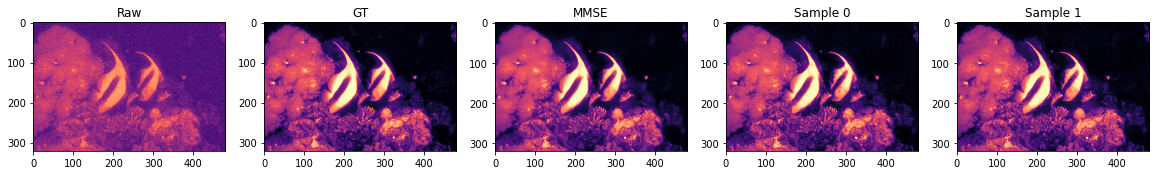

In [7]:
fig=plt.figure(figsize=(20, 10))
gt = test_images_gt[-1]
vmin=np.percentile(gt,0)
vmax=np.percentile(gt,99)


columns = 5
rows = 1
fig.add_subplot(rows, columns, 1)
plt.imshow(test_images[-1],cmap='magma')
plt.title("Raw")
fig.add_subplot(rows, columns, 2)
plt.imshow(gt,vmin=vmin, vmax=vmax,cmap='magma')
plt.title("GT")
fig.add_subplot(rows, columns, 3)
plt.imshow(img_mmse,vmin=vmin, vmax=vmax,cmap='magma')
plt.title("MMSE")
for i in range(4, columns*rows+1):
    img = samples[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img,vmin=vmin, vmax=vmax,cmap='magma')
    plt.title("Sample "+str(i-4))
plt.show()